In [1]:
%matplotlib inline

In [2]:
from dipy.reconst.dti import fractional_anisotropy, color_fa
from argparse import ArgumentParser
from scipy import ndimage
import os
import re
import numpy as np
import nibabel as nb
import sys
import matplotlib

#matplotlib.use('Agg')  # very important above pyplot import
import matplotlib.pyplot as plt

In [3]:
cd

/root


In [4]:
ls

Aut1367.nii                          final.ipynb
Final Downsampled.ipynb              index.html
Final Downsampled2.ipynb             miniTIFF/
Final Notebook.ipynb                 new/
Full Brain Highest Resolution.ipynb  oghomie/
Full Brain Less Downsampled.ipynb    pipeline.ipynb
Full Brain.ipynb                     prototype.ipynb
TIFF_stack/                          result/
Untitled-Copy1.ipynb                 sample0.tiff
Untitled.ipynb                       sample1.tiff
bigtiff/                             sample2.tiff
downsampled/                         sample3.tiff
downsampled.nii                      seelviz/
downsampled0.tiff                    supernew/
downsampled1.tiff                    tensor_rgb_upper.nii.gz
downsampled2.tiff                    tmp/
downsampled3.tiff                    v100_ch0_tensorfsl_dogsig1_gausig2.3.nii


In [5]:
cd oghomie/

/root/oghomie


In [6]:
ls

dogsigma_0gausigma_0tensorfsl.nii  og23.tiff   og365.tiff  og50.tiff
gradient_amplitudes.nii            og230.tiff  og366.tiff  og500.tiff
gradient_vectors.nii               og231.tiff  og367.tiff  og501.tiff
nohup.out                          og232.tiff  og368.tiff  og502.tiff
og0.tiff                           og233.tiff  og369.tiff  og503.tiff
og1.tiff                           og234.tiff  og37.tiff   og504.tiff
og10.tiff                          og235.tiff  og370.tiff  og505.tiff
og100.tiff                         og236.tiff  og371.tiff  og506.tiff
og101.tiff                         og237.tiff  og372.tiff  og507.tiff
og102.tiff                         og238.tiff  og373.tiff  og508.tiff
og103.tiff                         og239.tiff  og374.tiff  og509.tiff
og104.tiff                         og24.tiff   og375.tiff  og51.tiff
og105.tiff                         og240.tiff  og376.tiff  og510.tiff
og106.tiff                         og241.tiff  og377.tiff  og511.tiff
og107.tiff            

In [7]:
from dipy.reconst.dti import from_lower_triangular


In [8]:
ls

dogsigma_0gausigma_0tensorfsl.nii  og23.tiff   og365.tiff  og50.tiff
gradient_amplitudes.nii            og230.tiff  og366.tiff  og500.tiff
gradient_vectors.nii               og231.tiff  og367.tiff  og501.tiff
nohup.out                          og232.tiff  og368.tiff  og502.tiff
og0.tiff                           og233.tiff  og369.tiff  og503.tiff
og1.tiff                           og234.tiff  og37.tiff   og504.tiff
og10.tiff                          og235.tiff  og370.tiff  og505.tiff
og100.tiff                         og236.tiff  og371.tiff  og506.tiff
og101.tiff                         og237.tiff  og372.tiff  og507.tiff
og102.tiff                         og238.tiff  og373.tiff  og508.tiff
og103.tiff                         og239.tiff  og374.tiff  og509.tiff
og104.tiff                         og24.tiff   og375.tiff  og51.tiff
og105.tiff                         og240.tiff  og376.tiff  og510.tiff
og106.tiff                         og241.tiff  og377.tiff  og511.tiff
og107.tiff            

In [9]:
img = nb.load('dogsigma_0gausigma_0tensorfsl.nii')

In [10]:
data = img.get_data()


In [11]:
output = from_lower_triangular(data)

In [77]:
output_ds = output[50:4300, 50:700, :, :, :]

In [78]:

print output.shape
print output_ds.shape

(595, 912, 595, 3, 3)
(545, 650, 595, 3, 3)


In [79]:
FA = fractional_anisotropy(output_ds)

In [80]:
FA = np.clip(FA, 0, 1)

In [81]:
FA[np.isnan(FA)] = 0

In [82]:

print FA.shape

(545, 650, 595, 3)


In [83]:

from dipy.reconst.dti import decompose_tensor

In [84]:
evalues, evectors = decompose_tensor(output_ds)

In [85]:
print evectors[..., 0, 0].shape
print evectors.shape[-2:]

(545, 650, 595)
(3, 3)


In [86]:
print FA[:, :, :, 0].shape

(545, 650, 595)


In [87]:
RGB = color_fa(FA[:, :, :, 0], evectors)

In [88]:
nb.save(nb.Nifti1Image(np.array(255 * RGB, 'uint8'), img.get_affine()), 'tensor_rgb_upper.nii.gz')


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if __name__ == '__main__':


In [89]:
def plot_rgb(im):
    plt.rcParams.update({'axes.labelsize': 'x-large',
                         'axes.titlesize': 'x-large'})

    if im.shape == (182, 218, 182):
        x = [78, 90, 100]
        y = [82, 107, 142]
        z = [88, 103, 107]
    else:
        shap = im.shape
        x = [int(shap[0]*0.35), int(shap[0]*0.51), int(shap[0]*0.65)]
        y = [int(shap[1]*0.35), int(shap[1]*0.51), int(shap[1]*0.65)]
        z = [int(shap[2]*0.35), int(shap[2]*0.51), int(shap[2]*0.65)]
    coords = (x, y, z)

    labs = ['Sagittal Slice (YZ fixed)',
            'Coronal Slice (XZ fixed)',
            'Axial Slice (XY fixed)']
    var = ['X', 'Y', 'Z']

    idx = 0
    for i, coord in enumerate(coords):
        for pos in coord:
            idx += 1
            ax = plt.subplot(3, 3, idx)
            ax.set_title(var[i] + " = " + str(pos))
            if i == 0:
                image = ndimage.rotate(im[pos, :, :], 90)
            elif i == 1:
                image = ndimage.rotate(im[:, pos, :], 90)
            else:
                image = im[:, :, pos]

            if idx % 3 == 1:
                ax.set_ylabel(labs[i])
                ax.yaxis.set_ticks([0, image.shape[0]/2, image.shape[0] - 1])
                ax.xaxis.set_ticks([0, image.shape[1]/2, image.shape[1] - 1])

            plt.imshow(image)

    fig = plt.gcf()
    fig.set_size_inches(12.5, 10.5, forward=True)
    return fig

In [90]:
affine = img.get_affine()

fa = nb.Nifti1Image(np.array(255 * RGB, 'uint8'), affine)
im = fa.get_data()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if __name__ == '__main__':


In [91]:
print np.asarray(fa)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (545, 650, 595, 3)
affine: 
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : 
dim_info        : 0
dim             : [  4 545 650 595   3   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [ 1.  1.  1.  1.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : 
aux_file        : 
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c   

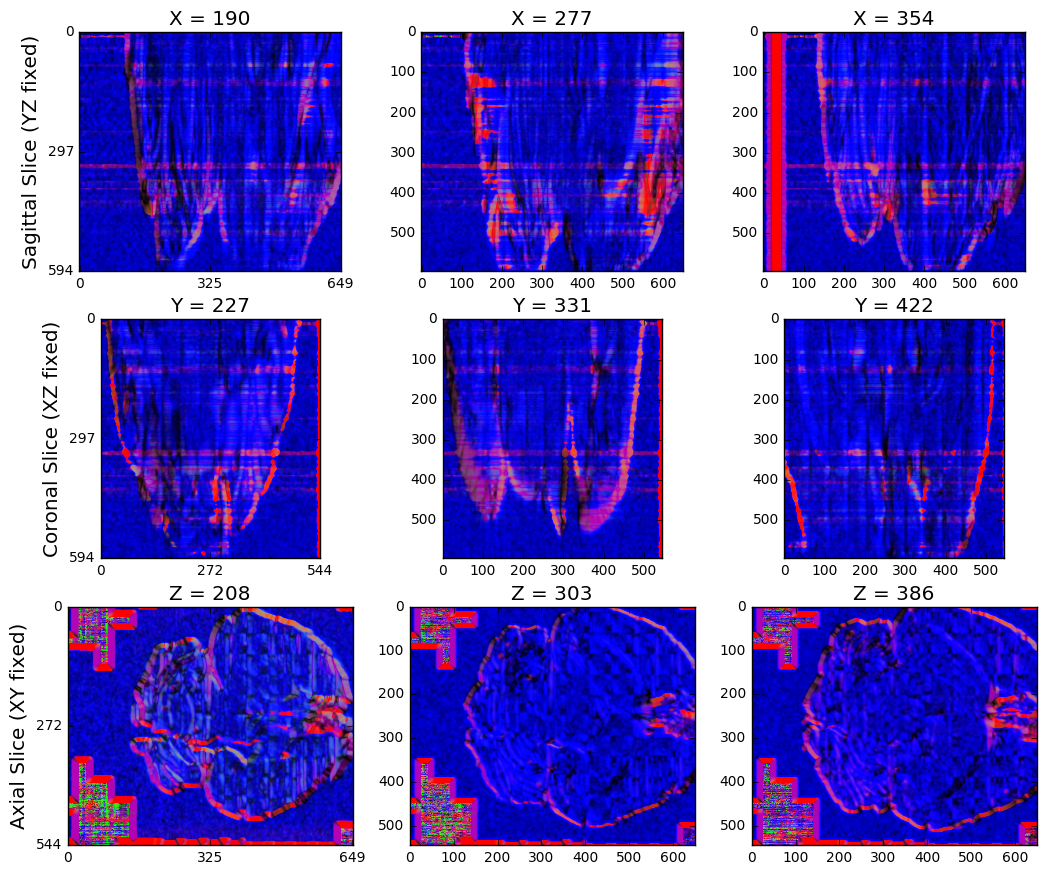

In [92]:
fig = plot_rgb(im)

In [50]:
import os

In [51]:
ls

dogsigma_0gausigma_0tensorfsl.nii  og276.tiff  og457.tiff
gradient_amplitudes.nii            og277.tiff  og458.tiff
gradient_vectors.nii               og278.tiff  og459.tiff
nohup.out                          og279.tiff  og46.tiff
og0.tiff                           og28.tiff   og460.tiff
og1.tiff                           og280.tiff  og461.tiff
og10.tiff                          og281.tiff  og462.tiff
og100.tiff                         og282.tiff  og463.tiff
og101.tiff                         og283.tiff  og464.tiff
og102.tiff                         og284.tiff  og465.tiff
og103.tiff                         og285.tiff  og466.tiff
og104.tiff                         og286.tiff  og467.tiff
og105.tiff                         og287.tiff  og468.tiff
og106.tiff                         og288.tiff  og469.tiff
og107.tiff                         og289.tiff  og47.tiff
og108.tiff                         og29.tiff   og470.tiff
og109.tiff                         og290.tiff  og471.tiff
og11.tiff       

In [52]:
ls

dogsigma_0gausigma_0tensorfsl.nii  og276.tiff  og457.tiff
gradient_amplitudes.nii            og277.tiff  og458.tiff
gradient_vectors.nii               og278.tiff  og459.tiff
nohup.out                          og279.tiff  og46.tiff
og0.tiff                           og28.tiff   og460.tiff
og1.tiff                           og280.tiff  og461.tiff
og10.tiff                          og281.tiff  og462.tiff
og100.tiff                         og282.tiff  og463.tiff
og101.tiff                         og283.tiff  og464.tiff
og102.tiff                         og284.tiff  og465.tiff
og103.tiff                         og285.tiff  og466.tiff
og104.tiff                         og286.tiff  og467.tiff
og105.tiff                         og287.tiff  og468.tiff
og106.tiff                         og288.tiff  og469.tiff
og107.tiff                         og289.tiff  og47.tiff
og108.tiff                         og29.tiff   og470.tiff
og109.tiff                         og290.tiff  og471.tiff
og11.tiff       

In [55]:
cd ~/oghomie

/root/oghomie


In [56]:
ls

dogsigma_0gausigma_0tensorfsl.nii  og276.tiff  og457.tiff
gradient_amplitudes.nii            og277.tiff  og458.tiff
gradient_vectors.nii               og278.tiff  og459.tiff
nohup.out                          og279.tiff  og46.tiff
og0.tiff                           og28.tiff   og460.tiff
og1.tiff                           og280.tiff  og461.tiff
og10.tiff                          og281.tiff  og462.tiff
og100.tiff                         og282.tiff  og463.tiff
og101.tiff                         og283.tiff  og464.tiff
og102.tiff                         og284.tiff  og465.tiff
og103.tiff                         og285.tiff  og466.tiff
og104.tiff                         og286.tiff  og467.tiff
og105.tiff                         og287.tiff  og468.tiff
og106.tiff                         og288.tiff  og469.tiff
og107.tiff                         og289.tiff  og47.tiff
og108.tiff                         og29.tiff   og470.tiff
og109.tiff                         og290.tiff  og471.tiff
og11.tiff       

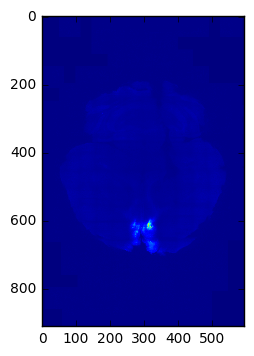

In [59]:
from PIL import Image
im = plt.imread('og230.tiff') 
plt.imshow(im)

In [37]:
FA.shape

(6, 10, 6, 3)